### Test AfflineMBD

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import leap
from leap.modules.components.linear import LULinear
import torch
from leap.modules.components.transforms import AffineMBDStep, AffineMBD
import torch.nn as nn

In [3]:
x = torch.rand(16, 40, 5)

In [4]:
af = AffineMBDStep(2,8)

In [5]:
x = torch.rand(16,1,2)
y = torch.rand(16,8,2)

In [6]:
u, logabsdet = af(x, y)

In [7]:
logabsdet

tensor([-1.1921e-07, -1.1921e-07, -1.1921e-07, -1.1921e-07, -1.1921e-07,
        -1.1921e-07, -1.1921e-07, -1.1921e-07, -1.1921e-07, -1.1921e-07,
        -1.1921e-07, -1.1921e-07, -1.1921e-07, -1.1921e-07, -1.1921e-07,
        -1.1921e-07], grad_fn=<MulBackward0>)

In [8]:
af.inverse(u, y)

(tensor([[[0.5112, 0.8217]],
 
         [[0.6444, 0.1451]],
 
         [[0.7690, 0.8132]],
 
         [[0.3333, 0.3274]],
 
         [[0.7894, 0.6613]],
 
         [[0.7411, 0.7508]],
 
         [[0.4403, 0.6816]],
 
         [[0.2127, 0.8838]],
 
         [[0.9767, 0.1869]],
 
         [[0.6916, 0.5449]],
 
         [[0.0849, 0.2057]],
 
         [[0.4057, 0.2201]],
 
         [[0.1451, 0.7642]],
 
         [[0.7507, 0.5688]],
 
         [[0.0894, 0.4452]],
 
         [[0.3778, 0.9559]]], grad_fn=<UnsqueezeBackward0>),
 tensor([1.1921e-07, 1.1921e-07, 1.1921e-07, 1.1921e-07, 1.1921e-07, 1.1921e-07,
         1.1921e-07, 1.1921e-07, 1.1921e-07, 1.1921e-07, 1.1921e-07, 1.1921e-07,
         1.1921e-07, 1.1921e-07, 1.1921e-07, 1.1921e-07],
        grad_fn=<MulBackward0>))

In [9]:
x

tensor([[[0.5112, 0.8217]],

        [[0.6444, 0.1451]],

        [[0.7690, 0.8132]],

        [[0.3333, 0.3274]],

        [[0.7894, 0.6613]],

        [[0.7411, 0.7508]],

        [[0.4403, 0.6816]],

        [[0.2127, 0.8838]],

        [[0.9767, 0.1869]],

        [[0.6916, 0.5449]],

        [[0.0849, 0.2057]],

        [[0.4057, 0.2201]],

        [[0.1451, 0.7642]],

        [[0.7507, 0.5688]],

        [[0.0894, 0.4452]],

        [[0.3778, 0.9559]]])

In [10]:
aff = AffineMBD(2, 8)

In [11]:
combined = torch.cat((y,x),dim=1)

In [12]:
combined.shape

torch.Size([16, 9, 2])

In [13]:
u, log_detJ = aff(combined)

torch.Size([16, 1, 9, 2])
torch.Size([16, 1, 2]) torch.Size([16, 8, 2])


In [14]:
x

tensor([[[0.5112, 0.8217]],

        [[0.6444, 0.1451]],

        [[0.7690, 0.8132]],

        [[0.3333, 0.3274]],

        [[0.7894, 0.6613]],

        [[0.7411, 0.7508]],

        [[0.4403, 0.6816]],

        [[0.2127, 0.8838]],

        [[0.9767, 0.1869]],

        [[0.6916, 0.5449]],

        [[0.0849, 0.2057]],

        [[0.4057, 0.2201]],

        [[0.1451, 0.7642]],

        [[0.7507, 0.5688]],

        [[0.0894, 0.4452]],

        [[0.3778, 0.9559]]])

In [15]:
aff.inverse(u, y)

(tensor([[[0.5112, 0.8217]],
 
         [[0.6444, 0.1451]],
 
         [[0.7690, 0.8132]],
 
         [[0.3333, 0.3274]],
 
         [[0.7894, 0.6613]],
 
         [[0.7411, 0.7508]],
 
         [[0.4403, 0.6816]],
 
         [[0.2127, 0.8838]],
 
         [[0.9767, 0.1869]],
 
         [[0.6916, 0.5449]],
 
         [[0.0849, 0.2057]],
 
         [[0.4057, 0.2201]],
 
         [[0.1451, 0.7642]],
 
         [[0.7507, 0.5688]],
 
         [[0.0894, 0.4452]],
 
         [[0.3778, 0.9559]]], grad_fn=<CatBackward>),
 tensor([1.1921e-07, 1.1921e-07, 1.1921e-07, 1.1921e-07, 1.1921e-07, 1.1921e-07,
         1.1921e-07, 1.1921e-07, 1.1921e-07, 1.1921e-07, 1.1921e-07, 1.1921e-07,
         1.1921e-07, 1.1921e-07, 1.1921e-07, 1.1921e-07],
        grad_fn=<AddBackward0>))

In [130]:
import torch.nn as nn


In [159]:
ln = LULinear(5, identity_init=True, using_cache=True)

### Test AffineCoupling

In [12]:
from leap.modules.components.transforms import AfflineCoupling
import torch.distributions as D
import torch.nn as nn

In [18]:
class Flow(nn.Module):
    def __init__(self, transforms, input_size=2):
        super().__init__()
        self.net = transforms
        # base distribution for calculation of log prob under the model
        self.register_buffer('base_dist_mean', torch.zeros(input_size))
        self.register_buffer('base_dist_var', torch.eye(input_size))

    @property
    def base_dist(self):
        return D.MultivariateNormal(self.base_dist_mean, self.base_dist_var)

    def forward(self, x):
        return self.net(x)

    def inverse(self, z):
        return self.net.inverse(z)

    def log_prob(self, x):
        z, sum_log_abs_det_jacobians = self.forward(x)
        logp = self.base_dist.log_prob(z) + sum_log_abs_det_jacobians
        return torch.mean(logp)

    def sample(self, batch_size): 
        z = self.base_dist.sample((batch_size, ))
        logp = self.base_dist.log_prob(z)
        x, _ = self.inverse(z)
        return x

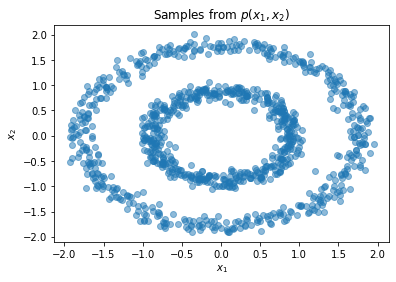

/home/cmu_wyao/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/cmu_wyao/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


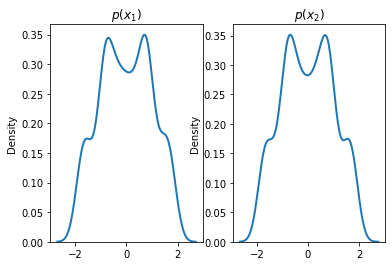

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import seaborn as sns

n_samples = 1000
X, y = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
X = StandardScaler().fit_transform(X)

plt.title(r'Samples from $p(x_1,x_2)$')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.show()

plt.subplot(1, 2, 1)
sns.distplot(X[:,0], hist=False, kde=True,
             bins=None,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title(r'$p(x_1)$')
plt.subplot(1, 2, 2)
sns.distplot(X[:,1], hist=False, kde=True,
             bins=None,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title(r'$p(x_2)$')
plt.show()

In [20]:
flow = Flow(AfflineCoupling(6,2,8,3), 2)
dataset = torch.tensor(X, dtype=torch.float)
optimizer = torch.optim.Adam(flow.net.parameters(), lr=1e-2)

In [21]:
for step in range(500):
    optimizer.zero_grad()
    loss = -flow.log_prob(dataset).mean()
    loss.backward()
    optimizer.step()

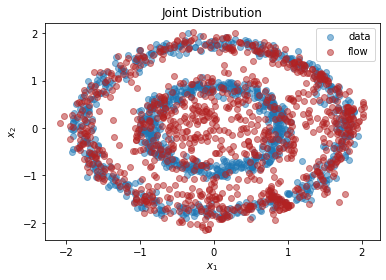

/home/cmu_wyao/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/cmu_wyao/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/cmu_wyao/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

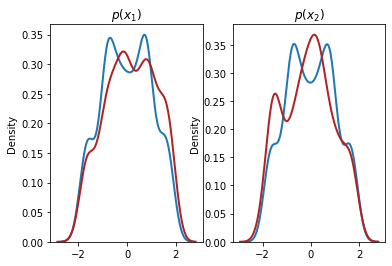

In [22]:
X_flow = flow.sample(1000).detach().numpy()
plt.title(r'Joint Distribution')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.scatter(X[:,0], X[:,1], label='data', alpha=0.5)
plt.scatter(X_flow[:,0], X_flow[:,1], color='firebrick', label='flow', alpha=0.5)
plt.legend()
plt.show()

plt.subplot(1, 2, 1)
sns.distplot(X[:,0], hist=False, kde=True,
             bins=None,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
             label='data')
sns.distplot(X_flow[:,0], hist=False, kde=True,
             bins=None, color='firebrick',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
             label='flow')
plt.title(r'$p(x_1)$')
plt.subplot(1, 2, 2)
sns.distplot(X[:,1], hist=False, kde=True,
             bins=None,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
             label='data')
sns.distplot(X_flow[:,1], hist=False, kde=True,
             bins=None, color='firebrick',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
             label='flow')
plt.title(r'$p(x_2)$')
plt.show()